In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df2 = pd.read_csv('cleaned_df-2', index_col = 0)

In [3]:
df2

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,reno,price_per_sqft,year,day,month,season,sqft_living_times_grade,condition_div_grade,sqft_living_sq,bathrooms_sq
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,...,0,188.050847,2014.0,13.0,10.0,fall,8260,0.428571,1392400,1.0000
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,...,1,209.338521,2014.0,9.0,12.0,winter,17990,0.428571,6604900,5.0625
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,...,0,233.766234,2015.0,25.0,2.0,winter,4620,0.500000,592900,1.0000
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,...,0,308.163265,2014.0,9.0,12.0,winter,13720,0.714286,3841600,9.0000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,...,0,303.571429,2015.0,18.0,2.0,winter,13440,0.375000,2822400,4.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,...,0,235.294118,2014.0,21.0,5.0,spring,12240,0.375000,2340900,6.2500
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,...,0,173.160173,2015.0,23.0,2.0,winter,18480,0.375000,5336100,6.2500
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,...,0,394.216667,2014.0,23.0,6.0,summer,7140,0.428571,1040400,0.5625
21595,291310100,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,3,...,0,250.000000,2015.0,16.0,1.0,winter,12800,0.375000,2560000,6.2500


In [4]:
df2.zipcode.max()

98199

In [5]:
df2.zipcode.min()

98001

In [6]:
dfgo = pd.read_csv('2015_zip.csv')

In [7]:
dfgo

,nhgis0003_ds215_20155_2015_zcta,Unnamed: 1,Unnamed: 2
0,GISJOIN,NAME_E,ADNKE001
1,GIS Join Match Code,Estimates: Area Name,Estimates: Median household income in the past...
2,G00601,601,10816
3,G00602,602,16079
4,G00603,603,16804
...,...,...,...
33117,G99923,99923,NaN
33118,G99925,99925,38594
33119,G99926,99926,51071
33120,G99927,99927,19861


In [8]:
headers = dfgo.iloc[0]
new_df  = pd.DataFrame(dfgo.values[1:], columns=headers)

In [9]:
new_df

,GISJOIN,NAME_E,ADNKE001
0,GIS Join Match Code,Estimates: Area Name,Estimates: Median household income in the past...
1,G00601,601,10816
2,G00602,602,16079
3,G00603,603,16804
4,G00606,606,12512
...,...,...,...
33116,G99923,99923,NaN
33117,G99925,99925,38594
33118,G99926,99926,51071
33119,G99927,99927,19861


In [10]:
new_df = new_df.drop('GISJOIN', axis = 1)

In [11]:
dfzip = new_df.rename(columns={'NAME_E': 'zipcode', 'ADNKE001': 'median_income'})

In [12]:
dfzip

,zipcode,median_income
0,Estimates: Area Name,Estimates: Median household income in the past...
1,601,10816
2,602,16079
3,603,16804
4,606,12512
...,...,...
33116,99923,NaN
33117,99925,38594
33118,99926,51071
33119,99927,19861


I want to isolate the king county zip codes and map the median income onto our data frame

In [13]:
dfzip = dfzip.drop(0, axis = 0)

In [14]:
dfzip[["zipcode", "median_income"]] = dfzip[["zipcode", "median_income"]].apply(pd.to_numeric)

In [15]:
dfzip.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33120 entries, 1 to 33120
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   zipcode        33120 non-null  int64  
 1   median_income  31067 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 776.2 KB


In [16]:
dfzip = dfzip[dfzip.zipcode >= 98001]

In [17]:
dfzip.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 836 entries, 32285 to 33120
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   zipcode        836 non-null    int64  
 1   median_income  775 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 19.6 KB


In [18]:
dfzip = dfzip[dfzip.zipcode <= 98199]

In [19]:
dfzip.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93 entries, 32285 to 32377
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   zipcode        93 non-null     int64  
 1   median_income  88 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 2.2 KB


In [20]:
zipcodedict = dfzip.set_index('zipcode').T.to_dict('list')

In [21]:
zipcodedict

{98001: [71555.0],
 98002: [45078.0],
 98003: [46250.0],
 98004: [102374.0],
 98005: [88940.0],
 98006: [113778.0],
 98007: [79579.0],
 98008: [86005.0],
 98010: [71563.0],
 98011: [76961.0],
 98012: [87086.0],
 98014: [98011.0],
 98019: [96630.0],
 98020: [79431.0],
 98021: [102097.0],
 98022: [62842.0],
 98023: [72303.0],
 98024: [112308.0],
 98026: [75496.0],
 98027: [102025.0],
 98028: [90588.0],
 98029: [100725.0],
 98030: [52713.0],
 98031: [67793.0],
 98032: [49591.0],
 98033: [105449.0],
 98034: [81694.0],
 98036: [63204.0],
 98037: [62561.0],
 98038: [96134.0],
 98039: [174063.0],
 98040: [126106.0],
 98042: [89352.0],
 98043: [64992.0],
 98045: [93380.0],
 98047: [55601.0],
 98050: [nan],
 98051: [84096.0],
 98052: [106468.0],
 98053: [120970.0],
 98055: [61736.0],
 98056: [73330.0],
 98057: [42775.0],
 98058: [82134.0],
 98059: [93918.0],
 98065: [120814.0],
 98068: [53750.0],
 98070: [71820.0],
 98072: [106545.0],
 98074: [145262.0],
 98075: [150301.0],
 98077: [137900.0],


In [22]:
zipcodemap = dfzip.set_index('zipcode')['median_income'].to_dict()

In [23]:
df2['median_by_zip'] = df2['zipcode'].map(zipcodemap)

In [24]:
df2

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,price_per_sqft,year,day,month,season,sqft_living_times_grade,condition_div_grade,sqft_living_sq,bathrooms_sq,median_by_zip
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,...,188.050847,2014.0,13.0,10.0,fall,8260,0.428571,1392400,1.0000,60839.0
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,...,209.338521,2014.0,9.0,12.0,winter,17990,0.428571,6604900,5.0625,54561.0
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,...,233.766234,2015.0,25.0,2.0,winter,4620,0.500000,592900,1.0000,90588.0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,...,308.163265,2014.0,9.0,12.0,winter,13720,0.714286,3841600,9.0000,90625.0
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,...,303.571429,2015.0,18.0,2.0,winter,13440,0.375000,2822400,4.0000,145262.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,...,235.294118,2014.0,21.0,5.0,spring,12240,0.375000,2340900,6.2500,81330.0
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,...,173.160173,2015.0,23.0,2.0,winter,18480,0.375000,5336100,6.2500,58429.0
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,...,394.216667,2014.0,23.0,6.0,summer,7140,0.428571,1040400,0.5625,62633.0
21595,291310100,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,3,...,250.000000,2015.0,16.0,1.0,winter,12800,0.375000,2560000,6.2500,102025.0


In [25]:
mediandf = pd.DataFrame(df2.median_by_zip)

In [26]:
mediandf

,median_by_zip
0,60839.0
1,54561.0
2,90588.0
3,90625.0
4,145262.0
...,...
21592,81330.0
21593,58429.0
21594,62633.0
21595,102025.0


In [41]:
mediandf.to_csv('mediandf.csv')

In [28]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21577 entries, 0 to 21596
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       21577 non-null  int64  
 1   price                    21577 non-null  float64
 2   bedrooms                 21577 non-null  int64  
 3   bathrooms                21577 non-null  float64
 4   sqft_living              21577 non-null  int64  
 5   sqft_lot                 21577 non-null  int64  
 6   floors                   21577 non-null  float64
 7   waterfront               21577 non-null  float64
 8   view                     21577 non-null  float64
 9   condition                21577 non-null  int64  
 10  grade                    21577 non-null  int64  
 11  sqft_above               21577 non-null  int64  
 12  sqft_basement            21577 non-null  float64
 13  yr_built                 21577 non-null  int64  
 14  yr_renovated          

In [29]:
dfdrop = df2.drop('price',axis = 1)

In [30]:
dfdrop = dfdrop.drop('id',axis = 1)

In [31]:
dfdrop = dfdrop.drop('season',axis = 1)

In [32]:
dfdrop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21577 entries, 0 to 21596
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   bedrooms                 21577 non-null  int64  
 1   bathrooms                21577 non-null  float64
 2   sqft_living              21577 non-null  int64  
 3   sqft_lot                 21577 non-null  int64  
 4   floors                   21577 non-null  float64
 5   waterfront               21577 non-null  float64
 6   view                     21577 non-null  float64
 7   condition                21577 non-null  int64  
 8   grade                    21577 non-null  int64  
 9   sqft_above               21577 non-null  int64  
 10  sqft_basement            21577 non-null  float64
 11  yr_built                 21577 non-null  int64  
 12  yr_renovated             21577 non-null  float64
 13  zipcode                  21577 non-null  int64  
 14  lat                   

In [33]:
X = dfdrop #want 2 dimensions of feature
y = df2['price']
#defining training and test data with 72/25 split and random state of 42
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)

In [34]:
# Replace missing values with the mean using simple imputer
imputer = SimpleImputer()
# Fit imputer to the indepedent variable using only the training data -- fit LEARNS the data so in this case it is 
#finding the mean
imputer.fit(X_train)
# Replace missing values in the training and test data with mean -- transform takes what fit learned and transforms
#the data with that information -- in this case replacing null values with the mean.
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

In [35]:
#Fit a LinearRegression model
baselinelinreg = LinearRegression()
baselinelinreg.fit(X_train, y_train)
#Check and interpret the intercept and coefficient
print(baselinelinreg.intercept_)
print(baselinelinreg.coef_)

11064968.399273211
[ 6.47824775e+03  2.44174755e+04 -1.21657605e+01 -1.04275692e-01
  8.68529126e+02  2.18379714e+05  1.59324506e+04  1.45379567e+05
 -1.51134928e+05  1.52281493e+01  2.75761055e+01  4.13479895e+01
  9.18492802e+02 -1.32854361e+02 -8.49922890e+03 -2.13354850e+04
 -1.96848857e+01 -9.34648308e-02 -1.79854539e+06  1.91238346e+03
  4.40044095e+01  7.58382806e+01  3.54250990e+01  5.08669557e+01
 -9.65391690e+05 -3.21398112e-02 -2.25942491e+03  3.13953598e-02]


In [36]:
#Make predictions on both the training and testing data
train_preds = baselinelinreg.predict(X_train)
test_preds = baselinelinreg.predict(X_test)

In [37]:
#find root(here by raising to .5 power) mean squared error o training and test predictions
train_score = (mean_squared_error(y_train, train_preds))**.5
test_score = (mean_squared_error(y_test, test_preds))**.5
print('Basline Train score:', train_score)
print('Baseline Test score:', test_score)

Basline Train score: 102713.86808466716
Baseline Test score: 99136.3539444475


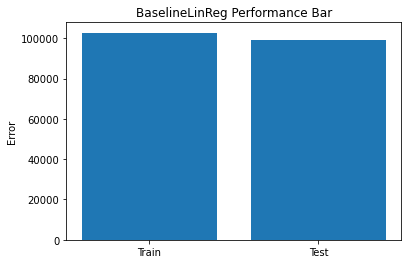

In [38]:
plt.bar(['Train', 'Test'], [train_score, test_score])
plt.ylabel('Error')
plt.title('BaselineLinReg Performance Bar');

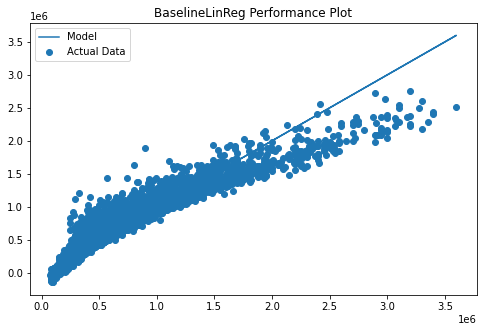

In [39]:
plt.figure(figsize=(8, 5))
plt.scatter(y_train, train_preds, label='Actual Data')
plt.plot(y_train, y_train, label='Model')
plt.title('BaselineLinReg Performance Plot')
plt.legend();